# Geometry Optimization

https://education.molssi.org/qm-tools/01-geom-opt/index.html

## Optimizaing Benzene

In [1]:
# import the python modules that we will use
import psi4
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

The first function plot_R measures the bond distance between two specified atoms at each step of our geometry optimization. The next function, plot_energy extracts the energy at each optimization step.

In [2]:
# function to find the bond distance for two specific atoms in the optimization file
def plot_R(filename, a, b):
    """
    Function to measure the distance between two atoms in a psi4 geometry optimization output file

    Usage: plot_R(filename, a, b)

    Inputs:
    filename: name of psi4 output file from geometry optimization calclaultion
    a and b: atom numbers for two atoms you want to measure the distance between

    Output: list of bond distance at for each optimization step
    """    
    with open(filename) as f:
        pair_notation = 'R(' + str(a) + ',' + str(b) + ')'
        rows_with_R_pairs = [line.split() for line in f if line.find(pair_notation) > 1 and
                             line.strip().split()[1].startswith(pair_notation)]
        bond_distances = []
        bond_distances.append(float(rows_with_R_pairs[0][3]))
        for item in rows_with_R_pairs:
            bond_distances.append(float(item[6]))
        return bond_distances

In [3]:
# function to find the energy in the optimization file
def plot_energy(filename):
    """
    Function to find the energy in a psi4 optimization file.

    Usage: plot_energy(filename)

    Inputs: name of psi4 output file from geometry optimization calclaultion
    filename: name

    Output: list of energy values from each optimization step
    """

    with open(filename) as f:
        #energy_string = 'Current energy'
        energy_values = [ float(line.split()[3]) for line in f if line.strip().startswith('Current energy') ]
        return energy_values

## Setting up the molecule

In [6]:
# set the amount of memory that you will need
psi4.set_memory('2 GB')

# set the number of threads (processes) for Psi4 to use
# (~all modern computers can handle 2 threads)
psi4.set_num_threads(2)

# set the molecule name for your files and plots
molecule_name = "benzene"

# enter the charge, multiplicity, and starting coordinates of the atoms in your molecule
benzene = psi4.geometry("""
0 1
   C       -3.98116        3.81771        0.00000
   C       -2.63351        3.75967        0.10838
   C       -2.11978        2.80187       -0.29323
   C       -2.68901        1.83558       -0.80805
   C       -3.92704        1.83138       -0.93484
   C       -4.58021        2.71451       -0.58263
   H       -4.52562        4.63006        0.32966
   H       -2.09025        4.53029        0.52795
   H       -1.09209        2.75239       -0.21305
   H       -2.13621        1.02769       -1.13476
   H       -4.38300        1.01321       -1.36811
   H       -5.60487        2.68217       -0.70124
""")

# Set the name of the output file for the initial energy calculation
# Calculate the initial energy of the molecule using the Hartree-Fock method
# and the cc-pVDZ basis set and print the output to a file
psi4.set_output_file(F'{molecule_name}_energy_initial.dat', False)
psi4.energy('scf/cc-pVDZ')

# Set the name of the output file to write the geometry information
# Print atomic coordinates and interatomic distances to this file
psi4.set_output_file(F'{molecule_name}_geometry_initial.dat', False)
benzene.print_out_in_angstrom()
benzene.print_distances()

In [7]:
import fortecubeview

fortecubeview.geom(molecule = benzene)

Renderer(camera=OrthographicCamera(bottom=-5.0, children=(DirectionalLight(color='white', intensity=0.5, posit…

## Geometry Optimization

In [8]:
# optimize the molecular geometry
psi4.set_output_file(F'{molecule_name}_geometry_optimization.dat', False)
psi4.optimize('scf/cc-pVDZ', molecule=benzene)

# print the optimized atomic coordinates and interatomic distances
psi4.set_output_file(F'{molecule_name}_geometry_final.dat', False)
benzene.print_out_in_angstrom()
benzene.print_distances()

Optimizer: Optimization complete!


## Reading bond distances from the geometry optimization file


In [11]:
help(plot_R)

Help on function plot_R in module __main__:

plot_R(filename, a, b)
    Function to measure the distance between two atoms in a psi4 geometry optimization output file
    
    Usage: plot_R(filename, a, b)
    
    Inputs:
    filename: name of psi4 output file from geometry optimization calclaultion
    a and b: atom numbers for two atoms you want to measure the distance between
    
    Output: list of bond distance at for each optimization step



## Plotting how bond distances change during optimization

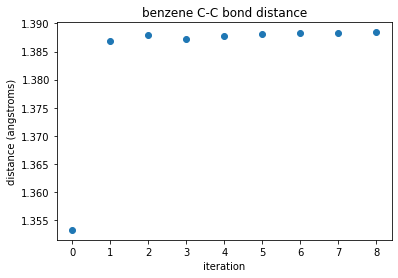

In [9]:
# find the bond distance for atoms C1 and C2
bond_distances = plot_R('benzene_geometry_optimization.dat',1,2)

# plot the bond distances at each iteration of geometry optimization
plt.plot(bond_distances,'o')
plt.xlabel('iteration')
plt.ylabel('distance (angstroms)')
plt.title(molecule_name + ' C-C bond distance')
plt.show()

## Plotting how energy changes during optimization

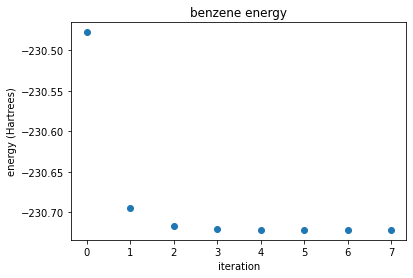

<Figure size 432x288 with 0 Axes>

In [10]:
# find the energies from this optimization file
energy_values = plot_energy('benzene_geometry_optimization.dat')

# plot the energies at each iteration
plt.figure()
plt.plot(energy_values,'o')
plt.xlabel("iteration")
plt.ylabel("energy (Hartrees)")
plt.title(F'{molecule_name} energy')
plt.show()
plt.savefig(F'benzene_energy.png')

In [11]:
import fortecubeview

fortecubeview.geom(molecule = benzene)

Renderer(camera=OrthographicCamera(bottom=-5.0, children=(DirectionalLight(color='white', intensity=0.5, posit…